In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep=";")
print(df.head(6))

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   
5      AL     ALB   28748.0            Tirana        EU           ALL   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   
5           Lek                 NaN   

In [ ]:
print("Cantidad de Filas y Columnas", df.shape)
print("Nombre de columnas", df.columns)

Cantidad de Filas y Columnas (252, 19)
Nombre de columnas Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [ ]:
#DESCRIPCIÓN ESTADÍSTICA

df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


In [ ]:
df.mean()

<ipython-input-7-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


area          5.952879e+05
geoname_id    2.427870e+06
numeric       4.343095e+02
population    2.727679e+07
dtype: float64

In [ ]:
df.std()

<ipython-input-8-ce97bb7eaef8>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


area          1.904818e+06
geoname_id    1.632093e+06
numeric       2.546631e+02
population    1.164127e+08
dtype: float64

#Verificación de correlación entre los datos

<ipython-input-9-57883bd17c5e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.set_index('alpha_3').corr()


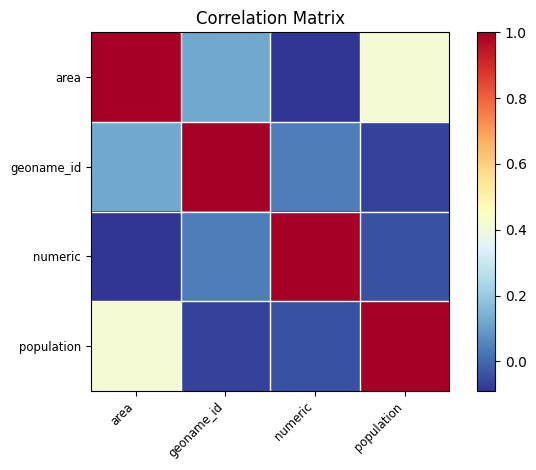

In [ ]:
corr = df.set_index('alpha_3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

#Segundo Archivo

Ahondar en el crecimiento de la población en los últimos años de México


In [ ]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pob = pd.read_csv(url)
print(df_pob.head(7))

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460
5  Afghanistan  1977    14880372
6  Afghanistan  1982    12881816


<Axes: xlabel='year'>

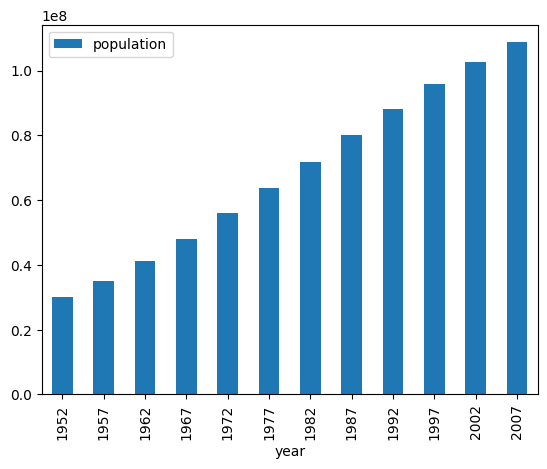

In [ ]:
#Filtrar México
df_pob_mx = df_pob[df_pob['country'] == 'Mexico']
df_pob_mx.set_index('year').plot(kind='bar')


# Comparativa entre 2 países

<Axes: >

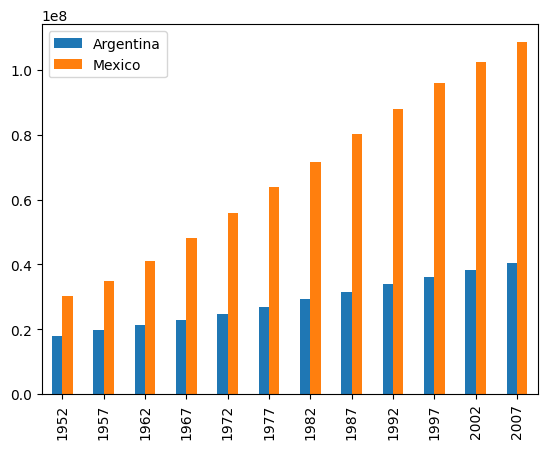

In [ ]:
df_pob_ar = df_pob[df_pob['country'] == 'Argentina']

anios = df_pob_ar['year'].unique()
pob_ar = df_pob_ar['population'].values
pob_mx = df_pob_mx['population'].values

df_plot = pd.DataFrame({'Argentina': pob_ar,
              'Mexico': pob_mx},
             index=anios)

df_plot.plot(kind='bar')


